# multivariate exploration of the geometry corpus

This is basicaly a raw exploration of the various info we can get from our corpus about wikipedia pages linked by the [`List of geometry topics` page](http://en.wikipedia.org/wiki/List_of_geometry_topics?oldformat=true). The aim of this study is to build an indicator allowing us to order pages by difficulty level.

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import json
import codecs

import math

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# network = json.load(codecs.open("data/wikipedia-geometry/network.json","r", "utf-8-sig"))
# specialization = json.load(codecs.open("data/wikipedia-geometry/specialization.json","r", "utf-8-sig"))

# print network

# print len(network["nodes"])


## data source preview

In [25]:
# for n in network["nodes"]:
#     titles.append(n["id"])

table = pd.read_csv("data/wikipedia-geometry/final.csv", encoding="UTF-8")
network_stats = pd.read_csv("data/wikipedia-geometry/pages-linked-by-coeditors.stats.csv", encoding="UTF-8")

#table.head(25) ## always this stupid utf-8 problem...

table = table.set_index("pagename")
network_stats = network_stats.set_index("pagename")
table = table.join(network_stats)


table.head(10)

,average word length,first revision,hidden users,length,number of backlinks,number of backlinks from ns 0,number of categories,number of links,number of revisions,number of revisions by IP,...,unique registered users,unique users,words,centrality,closeness,betweenness,current flow closeness,current flow betweenness,eigenvector,exclusive editors
pagename,,,,,,,,,,,,,,,,,,,,,
2D computer graphics,5.912321,2001-10-13T06:23:27Z,0,24124,0,0,7,403,370,124,...,139,221,3490,1,1,0.015467,6.222645,0.004381,0.039955,99
3D computer graphics,6.360368,2007-03-21T05:56:20Z,0,8803,0,0,8,195,893,368,...,240,498,1196,1,1,0.000000,8.099603,0.006997,0.065823,143
3-sphere,5.071429,2002-02-19T11:12:25Z,0,17595,0,0,7,116,277,59,...,117,161,2898,1,1,0.000000,7.858913,0.007360,0.052748,99
Affine geometry,5.424357,2003-06-11T09:28:43Z,0,15245,0,0,1,97,205,40,...,82,112,2373,1,1,0.000000,7.645164,0.007084,0.048833,69
Algebraic geometry,5.734462,2002-02-25T15:51:15Z,0,46919,1375,1009,1,379,626,189,...,213,366,6967,1,1,0.000000,9.725693,0.011190,0.092190,169
Altitude (triangle),5.543959,2002-12-24T06:11:40Z,0,12728,0,0,2,59,356,158,...,128,245,1945,1,1,0.000000,8.111066,0.007296,0.061286,98
Analytic geometry,5.544270,2002-02-25T15:51:15Z,0,29122,0,0,1,193,477,191,...,176,326,4450,1,1,0.000000,9.652685,0.010609,0.092383,141
Angle,5.132834,2002-02-25T15:43:11Z,0,32780,0,0,11,192,1742,704,...,468,952,5345,1,1,0.000000,11.073551,0.015027,0.151483,334
Angle trisection,5.515563,2002-09-25T07:26:51Z,0,14862,0,0,7,163,434,110,...,127,194,2281,1,1,0.000000,7.771890,0.006744,0.054907,89


## analysis

### raw distribution of specialization

The specialization indicator ($spe(wp,d)$) is a first attempt at quantifying the difficulty of pages.

- $n_{wp}$ is the number of revisions by registered users
- $i_{wp}$ is the number of revisions by unregistered users (IP)
- $P(d,v)$

\begin{align}
spe(wp, d) = \frac{ P(d, n_wp) - P(d,i_wp) }{ |d| + 1 }
\end{align}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109087c10>]], dtype=object)

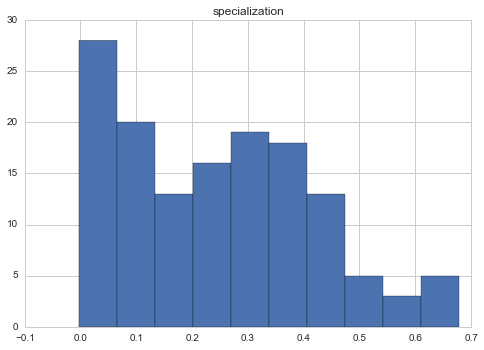

In [3]:
table.hist("specialization")

## correlation matrix

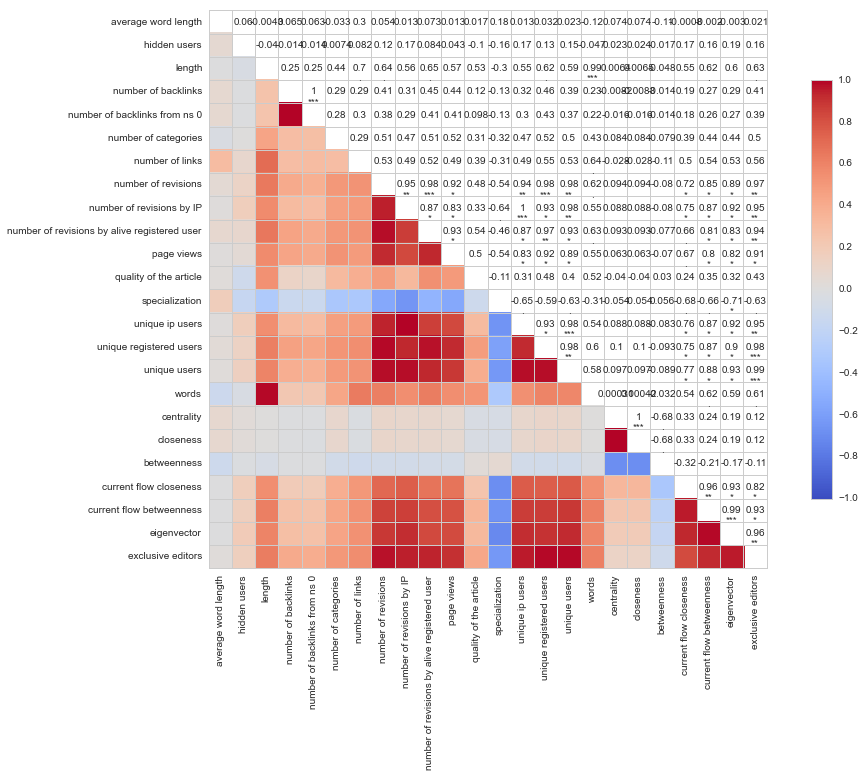

In [26]:
f, ax = plt.subplots(figsize=(16, 10))
sns.corrplot(table,diag_names=False)

### links x specialization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1099e1e90>]], dtype=object)

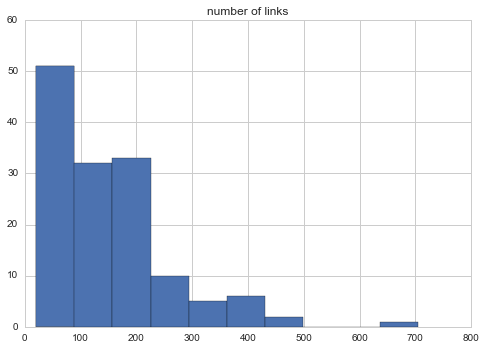

In [5]:
table.hist("number of links")

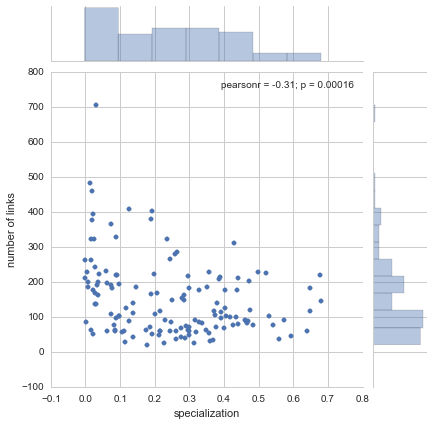

In [6]:
sns.jointplot(table.specialization, table["number of links"])

## quality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a399310>]], dtype=object)

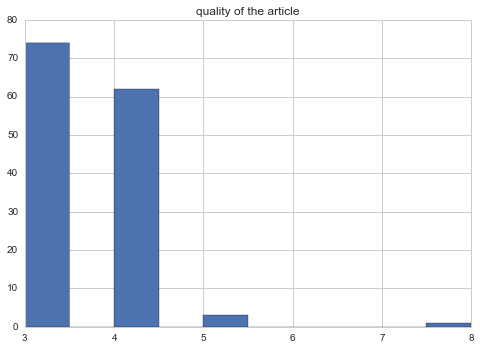

In [7]:
table.hist("quality of the article")

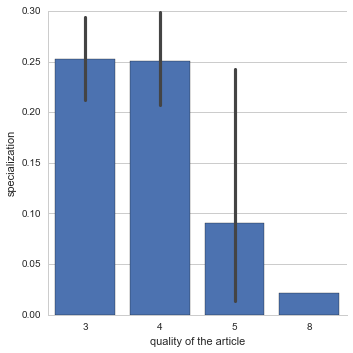

In [8]:
g = sns.factorplot("quality of the article", "specialization", data=table, kind="bar")
#g.despine()

g
#sns.jointplot(table.specialization, table["quality of the article"])

## word lengths

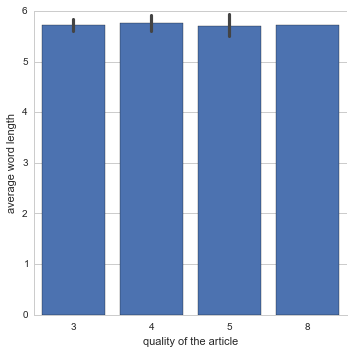

In [9]:
g = sns.factorplot("quality of the article", "average word length", data=table, kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a75d850>]], dtype=object)

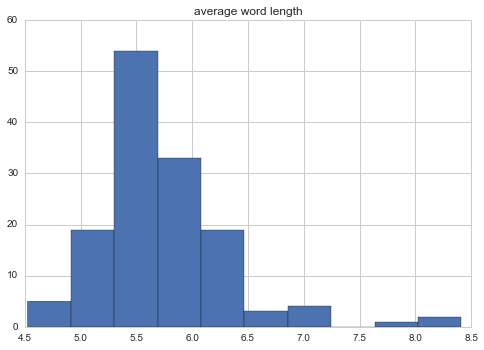

In [10]:
table.hist("average word length")

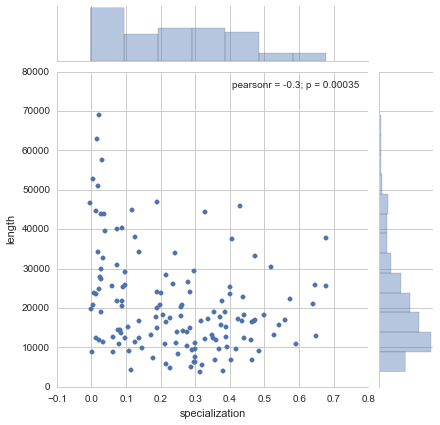

In [11]:
sns.jointplot(table.specialization, table["length"])

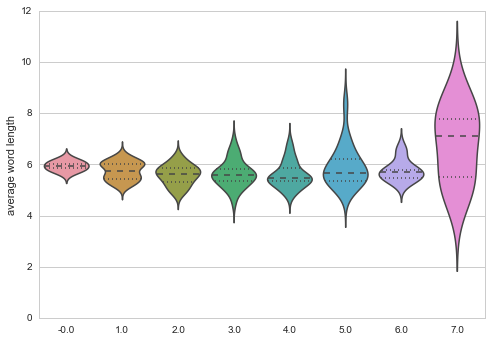

In [12]:
sns.violinplot(table["average word length"], [ math.ceil(x * 10) for x in table["specialization"]])

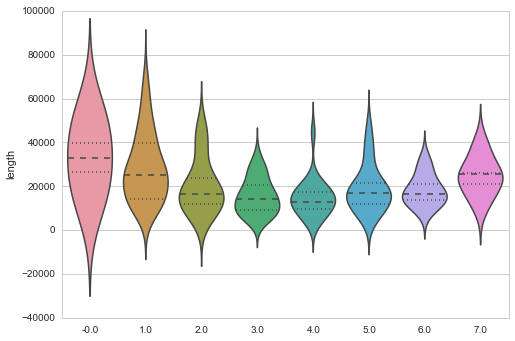

In [13]:
sns.violinplot(table["length"], [ math.ceil(x * 10) for x in table["specialization"]])

## length x revisions

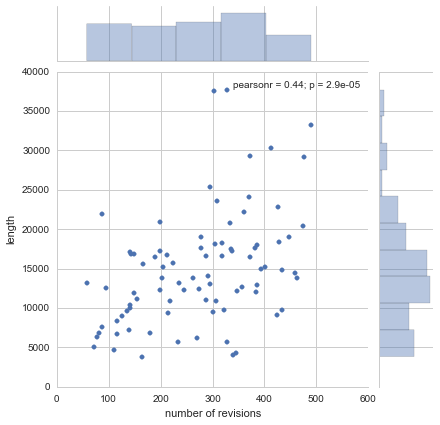

In [14]:
sns.jointplot("number of revisions", "length", data=table[table["number of revisions"] < 500])

## revisions x users

In [23]:
table["revisions / users"] = table["number of revisions"] / table["unique users"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b7bb850>]], dtype=object)

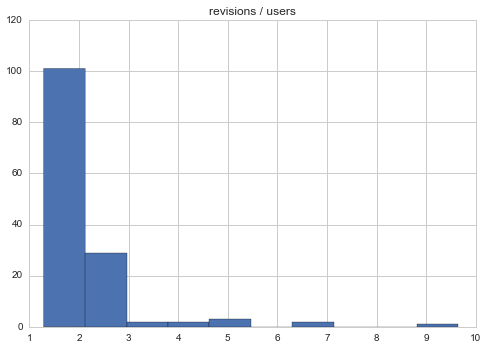

In [16]:
table.hist("revisions / users")

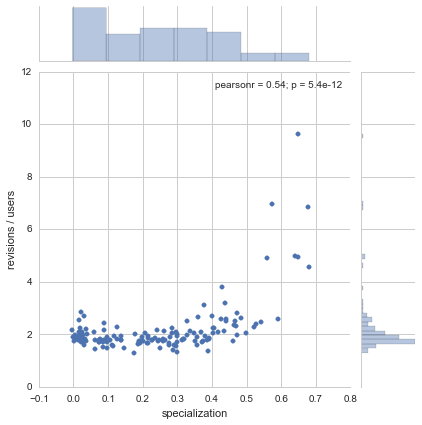

In [17]:
sns.jointplot(table.specialization, table["revisions / users"])

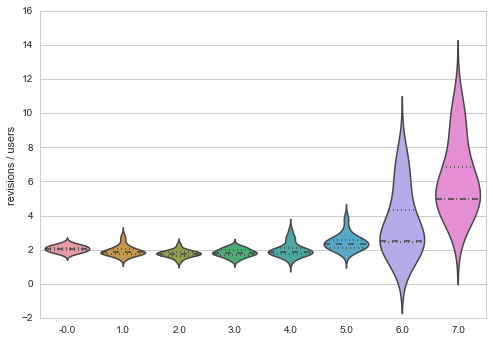

In [19]:
sns.violinplot(table["revisions / users"], [ math.ceil(x * 10) for x in table["specialization"]])

## page views

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e7cae50>]], dtype=object)

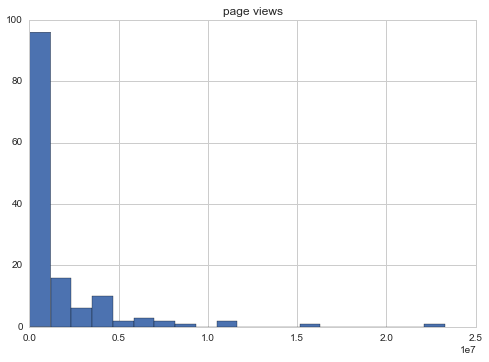

In [45]:
table.hist("page views", bins=20)